In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('Crawling_Newegg/info.csv')
df.head(100)

,item_id,title,brand,rating,n_rating,price,shipping,img_url,max_rslt,dp,hdmi,dirx,model
0,14-932-561,GIGABYTE GAMING OC GeForce RTX 4080 16GB GDDR6...,GIGABYTE,4.3,56.0,1269.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,7680 x 4320,3 x DisplayPort 1.4a,1 x HDMI 2.1,DirectX 12,GV-N4080GAMING
1,14-137-709,MSI Mech Radeon RX 6500 XT 4GB GDDR6 PCI Expre...,MSI,4.2,12.0,183.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,7680 x 4320,1 x DisplayPort 1.4a,1 x HDMI 2.1,NaN,RX
2,14-930-066,ASRock Radeon RX 6600 8GB GDDR6 PCI Express 4....,ASRock,4.8,100.0,429.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,7680 x 4320,3 x DisplayPort 1.4H,1 x HDMI 2.1,NaN,RX6600
3,14-930-056,ASRock Radeon RX 6700 XT Challenger D Gaming G...,ASRock,4.6,145.0,419.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,7680 x 4320,3 x DisplayPort 1.4H,1 x HDMI 2.1,NaN,RX6700XT
4,14-500-518,ZOTAC GAMING GeForce RTX 3060 Ti Twin Edge OC ...,ZOTAC,4.6,51.0,409.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,7680 x 4320,3 x DisplayPort 1.4a,1 x HDMI 2.1,NaN,ZT-A30610H-10MLHRItem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14-930-078,ASRock Challenger Arc A750 8GB GDDR6 PCI Expre...,GIGABYTE,4.7,3.0,289.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,7680 x 4320,NaN,1 x HDMI 2.1,NaN,A750
96,14-932-455,GIGABYTE Eagle OC GeForce RTX 3060 Ti 8GB GDDR...,XFX,4.8,27.0,449.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,7680 x 4320,2 x DisplayPort 1.4a,2 x HDMI 2.1,NaN,GV-N306TEAGLE
97,9SIAD2CHH37623,XFX SPEEDSTER SWFT 210 Radeon RX 6600 8GB GDDR...,GIGABYTE,4.5,77.0,249.99,$4.49 Shipping,https://c1.neweggimages.com/ProductImageCompre...,7680 x 4320,3 x DisplayPort 1.4H,1 x HDMI 2.1,NaN,RX-66XL8LFDQReturn
98,9SIB1PGJPG9906,GIGABYTE Gaming GeForce RTX 3080 Ti 12GB GDDR6...,ASUS,4.1,183.0,1530.00,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...,7680 x 4320,3 x DisplayPort 1.4a,2 x HDMI 2.1,NaN,GV-N308TGAMING


In [21]:
df.describe()

,rating,n_rating,price
count,1598.000000,1598.000000,3590.000000
mean,4.315269,48.246558,661.471170
std,0.645493,82.798912,577.557847
min,1.000000,1.000000,15.460000
25%,4.000000,5.000000,269.085000
50%,4.500000,18.000000,495.990000
75%,4.700000,57.000000,860.735000
max,5.000000,985.000000,5290.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   3600 non-null   object 
 1   title     3600 non-null   object 
 2   brand     3432 non-null   object 
 3   rating    1598 non-null   float64
 4   n_rating  1598 non-null   float64
 5   price     3590 non-null   float64
 6   shipping  3600 non-null   object 
 7   img_url   3600 non-null   object 
 8   max_rslt  1671 non-null   object 
 9   dp        1334 non-null   object 
 10  hdmi      1064 non-null   object 
 11  dirx      183 non-null    object 
 12  model     3600 non-null   object 
dtypes: float64(3), object(10)
memory usage: 365.8+ KB


In [23]:
df[df['shipping'].isnull()]

,item_id,title,brand,rating,n_rating,price,shipping,img_url,max_rslt,dp,hdmi,dirx,model


In [24]:
df['rating'].fillna(0, inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['brand'].fillna('unknow', inplace=True)
df['shipping'].fillna('unknow', inplace=True)

/tmp/ipykernel_37827/4113592587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(0, inplace=True)
/tmp/ipykernel_37827/4113592587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

# 1. The companies are providing graphics cards, the number of products of each company

In [29]:
df.groupby('brand', as_index=False).size()

,brand,size
0,AMD,32
1,AMD Radeon Memory,1
2,AORUS,1
3,ASPIRING,5
4,ASRock,27
5,ASRock Rack,1
6,ASUS,539
7,AX Gaming,8
8,Acer America,1
9,BFG Technologies,6


## 2. Price distribution of products

In [26]:
price = df.groupby('price', as_index=False).size()
price

,price,size
0,15.46,1
1,15.99,1
2,17.31,1
3,18.88,1
4,19.38,1
...,...,...
1577,4199.97,1
1578,4793.18,1
1579,4829.99,1
1580,4894.00,1


In [27]:
price.max()

price    5290.0
size      116.0
dtype: float64

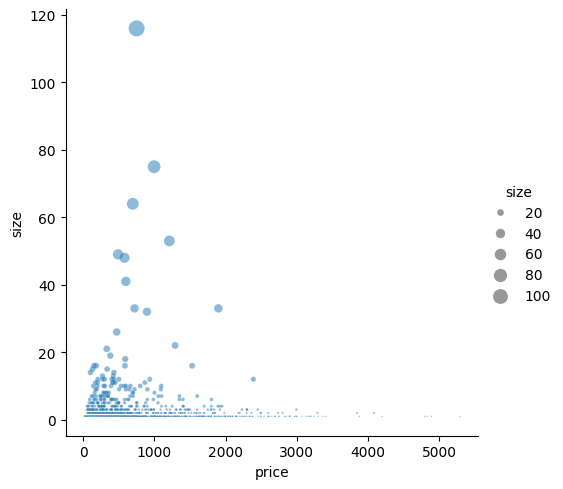

In [28]:
sns.relplot(
    data=price, x="price", y="size",
    size="size", sizes=(1, 133), alpha=0.5
)

### 3. Product price distribution by brand

<Axes: xlabel='brand', ylabel='price'>

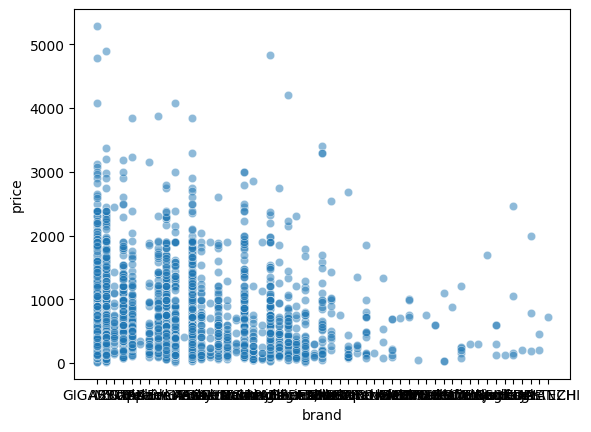

In [17]:
sns.scatterplot(data=df, x="brand", y="price", alpha=0.5)

#### 4. The relationship between product price and user rating

<Axes: xlabel='rating', ylabel='price'>

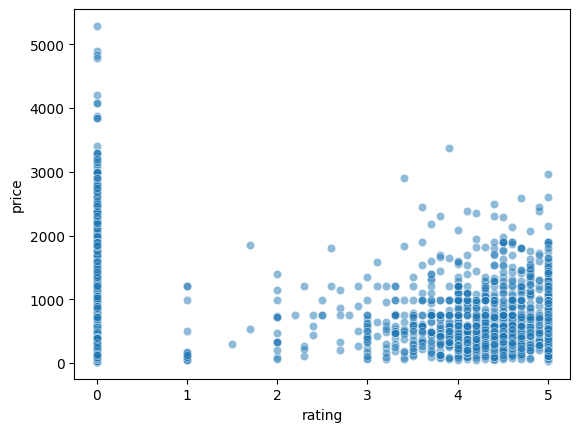

In [18]:
sns.scatterplot(data=df, x="rating", y="price", alpha=0.5)